<a href="https://www.kaggle.com/code/kyeongsupchoi/decisiontreeregressor-randomforestregressor?scriptVersionId=156133172" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="introduction"></a>
# **Introduction** 

In this analysis, we explore a dataset related to insurance charges, aiming to understand the factors influencing the costs associated with insurance. The dataset contains information about individuals, including their age, sex, body mass index (bmi), number of children, smoking status, region, and insurance charges.

* [Step 1: Exploratory Data Analysis](#step-one)
We start by loading the dataset into a Pandas DataFrame and examining its structure and summary statistics. The dataset comprises 1338 entries with no missing values. The features include numerical variables like age, bmi, children, and charges, as well as categorical variables such as sex, smoker, and region.

* [Step 2: Model Training](#step-two)
For our initial model, we employ a Decision Tree Regressor. The target variable (y) is the insurance charges, and the features (X) include age, bmi, and the number of children. The dataset is split into training and validation sets using the train_test_split function. The Decision Tree model is trained on the training set.

* [Step 3: Model Validation](#step-three)
We evaluate the model's performance on the validation set by calculating the Mean Absolute Error (MAE). Additionally, we experiment with different values of the hyperparameter "max_leaf_nodes" to observe its impact on model performance. The Decision Tree model is compared against Random Forest, another ensemble learning technique, to assess if it can provide better predictive accuracy.

These initial steps set the foundation for understanding the dataset and training models. Subsequent analysis and model tuning can provide further insights into the factors influencing insurance charges and enhance predictive accuracy.





In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

<a id="step-one"></a>
# **Step 1: Exploratory Data Analysis** 

Read data from csv and load into dataframe

In [2]:
# Load Dataframe from csv
df = pd.read_csv("/kaggle/input/insurancesmoker/insurance.csv")

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<a id="step-two"></a>
# **Step 2: Model Training**  

Train the initial model

In [5]:
# Define model. Specify a number for random_state to ensure same results each run
dec_model = DecisionTreeRegressor(random_state=1)

# Set target variable
y = df["charges"]

# Set features
X = df[["age", "bmi", "children"]]

# Test split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit model
dec_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

# **Step 3: Model Validation**

In [6]:
# Create predictions
val_predictions = dec_model.predict(val_X)

# Calculate mean absolute error
mean_absolute_error(val_y, val_predictions)

9782.212138360695

In [7]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [8]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  9212
Max leaf nodes: 50  		 Mean Absolute Error:  9110
Max leaf nodes: 500  		 Mean Absolute Error:  9768
Max leaf nodes: 5000  		 Mean Absolute Error:  9765


In [9]:
# Initialize and train random forest
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

9527.031209224337


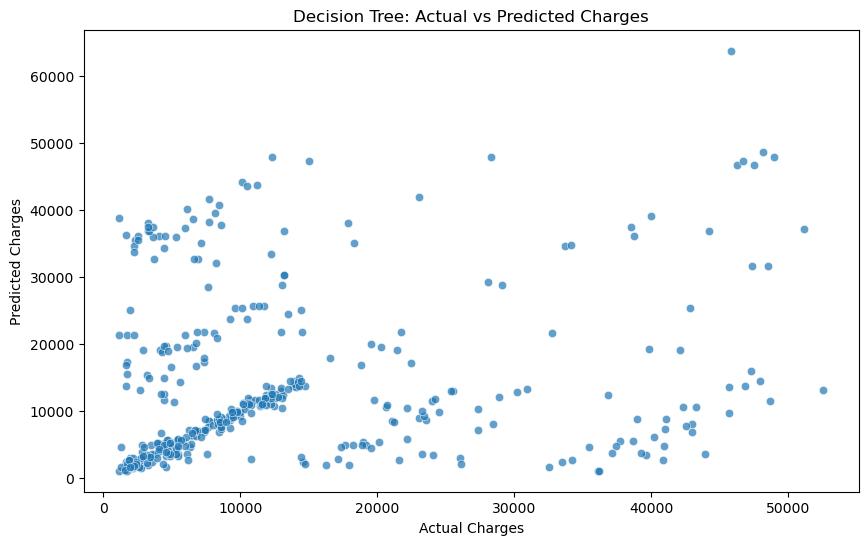

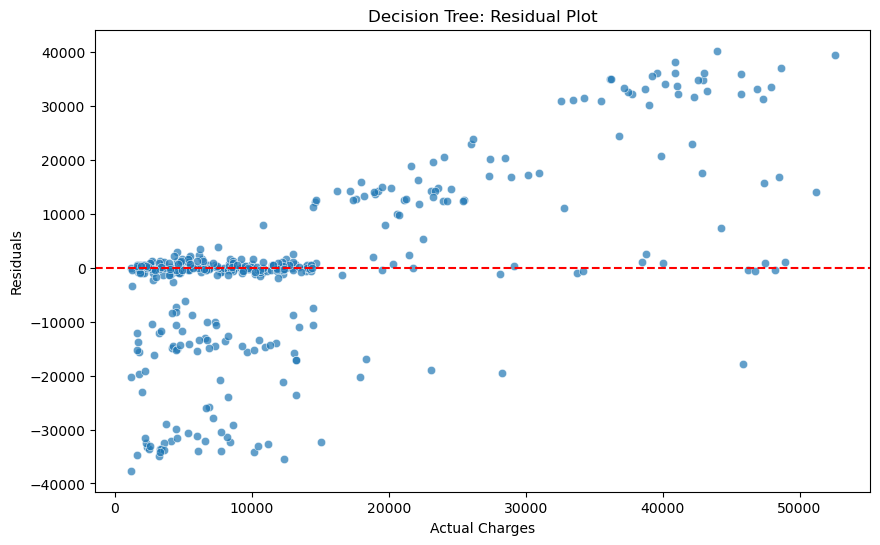

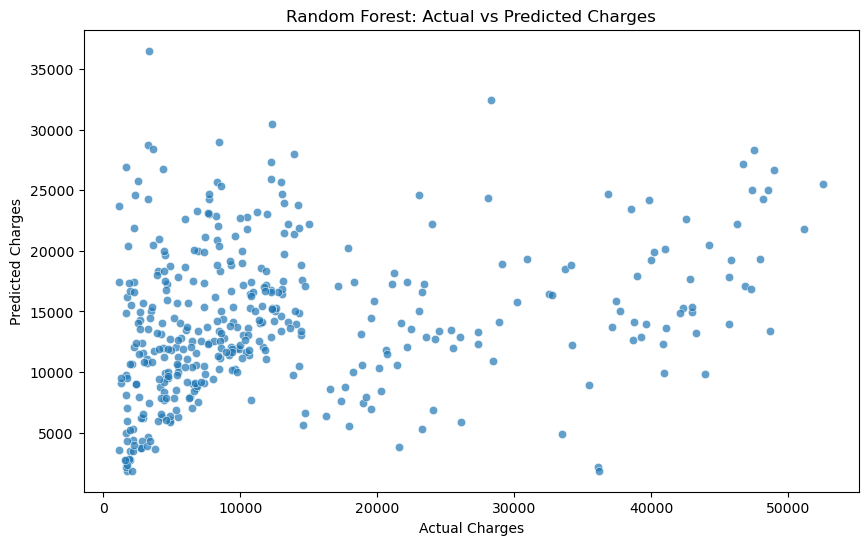

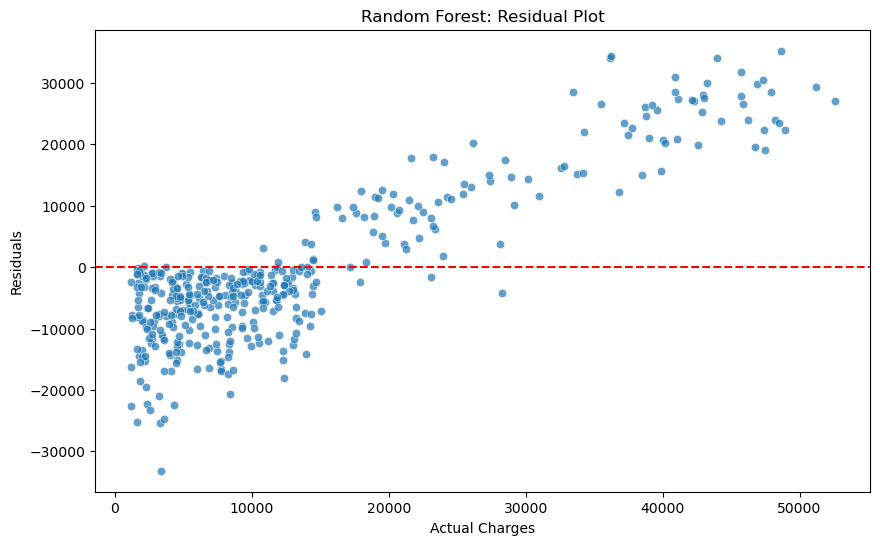

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization for Decision Tree
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
sns.scatterplot(x=val_y, y=val_predictions, alpha=0.7)
plt.title('Decision Tree: Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# Residual plot for Decision Tree
residuals = val_y - val_predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=val_y, y=residuals, alpha=0.7)
plt.title('Decision Tree: Residual Plot')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Visualization for Random Forest
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
sns.scatterplot(x=val_y, y=melb_preds, alpha=0.7)
plt.title('Random Forest: Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# Residual plot for Random Forest
forest_residuals = val_y - melb_preds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=val_y, y=forest_residuals, alpha=0.7)
plt.title('Random Forest: Residual Plot')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In conclusion, the exploratory data analysis revealed that the dataset contains information about individuals, including features such as age, BMI, number of children, smoking status, region, and medical charges. The dataset has 1338 entries with no missing values.

For the purpose of predicting medical charges, two models were trained and evaluated: a Decision Tree Regressor and a Random Forest Regressor. The initial Decision Tree model resulted in a mean absolute error (MAE) of approximately 9782.21 on the validation set. To improve the model, a hyperparameter tuning approach was applied by varying the maximum number of leaf nodes. The optimal value was not immediately clear, as the MAE fluctuated for different values.

Subsequently, a Random Forest Regressor was trained, and its performance was evaluated on the validation set, resulting in a mean absolute error of approximately 9527.03. While the Random Forest model did not outperform the Decision Tree significantly, it is worth noting that Random Forests often provide more robust predictions due to the ensemble nature of the model.

Visualizations were created to gain insights into the models' predictions. Scatter plots comparing actual charges to predicted charges illustrated how well the models captured the underlying patterns. Residual plots further highlighted the distribution of errors, indicating the extent to which the models overestimated or underestimated charges. In both cases, it is essential to ensure that the points are scattered randomly around the y=0 line in the residual plots, suggesting a balanced model fit.

In summary, the Decision Tree and Random Forest models can predict medical charges to a certain extent, with the Random Forest showing a slight improvement in performance. Continuous refinement and evaluation of models may be necessary to achieve better accuracy. Additionally, further exploration of feature importance and potential interactions among variables could enhance the predictive capabilities of the models.